In [1]:
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# the dataset for the demo
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split

# from feature-engine
from feature_engine.discretisers import EqualFrequencyDiscretiser
from feature_engine.categorical_encoders import OrdinalCategoricalEncoder

In [2]:
# load the the Boston House price data from Scikit-learn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                    columns=boston_dataset.feature_names)

# add the target
data['MEDV'] = boston_dataset.target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

## Equal-frequency discretization with Feature-engine

In [4]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [5]:
# with feature engine we can automate the process for many variables
# in one line of code

disc = EqualFrequencyDiscretiser(
    q=10, variables=['LSTAT', 'DIS', 'RM'], return_object=True)

disc.fit(X_train)

EqualFrequencyDiscretiser(q=10, return_object=True,
                          variables=['LSTAT', 'DIS', 'RM'])

In [6]:
# transform train and test

train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

Text(0, 0.5, 'mean of survived')

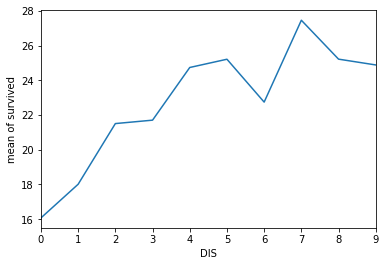

In [7]:
# let's explore if the bins have a linear relationship
# with the target: we see they don't

pd.concat([train_t, y_train], axis=1).groupby('DIS')['MEDV'].mean().plot()
plt.ylabel('mean of survived')

In [8]:
# let's order the bins

enc = OrdinalCategoricalEncoder(encoding_method = 'ordered')

enc.fit(train_t, y_train)

OrdinalCategoricalEncoder(encoding_method='ordered',
                          variables=['RM', 'DIS', 'LSTAT'])

In [9]:
# we can fnd the list of encoded variables here
enc.variables

['RM', 'DIS', 'LSTAT']

In [10]:
# we can find a list of the re-ordered bins mappings here
enc.encoder_dict_

{'RM': {0: 0, 1: 1, 2: 2, 3: 3, 5: 4, 6: 5, 4: 6, 7: 7, 8: 8, 9: 9},
 'DIS': {0: 0, 1: 1, 2: 2, 3: 3, 6: 4, 4: 5, 9: 6, 5: 7, 8: 8, 7: 9},
 'LSTAT': {9: 0, 8: 1, 7: 2, 6: 3, 5: 4, 4: 5, 3: 6, 2: 7, 1: 8, 0: 9}}

In [11]:
# let's transformt the data sets
train_t = enc.transform(train_t)
test_t = enc.transform(test_t)

Text(0, 0.5, 'mean of survived')

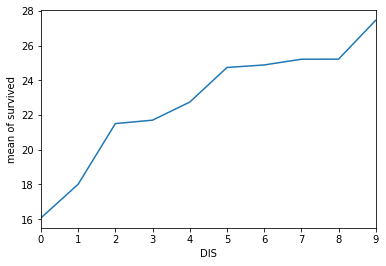

In [12]:
# let's explore the monotonic relationship between bins and target

pd.concat([train_t, y_train], axis=1).groupby('DIS')['MEDV'].mean().plot()
plt.ylabel('mean of survived')